In [1]:
import numpy as np
np.random.seed(1337)  # seed
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
# 從 '~/.keras/datasets/' download (第一次)
# X shape (60,000 28x28), y shape (10,000, )
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('平均=', np.mean(X_train))
print('最大值=', np.max(X_train))
print('最小值=', np.min(X_train))
print('中位數=', np.median(X_train))
print('變異數=', np.var(X_train))
print('標準差=', np.std(X_train))

平均= 33.3184214498
最大值= 255
最小值= 0
中位數= 0.0
變異數= 6172.85048229
標準差= 78.5674899834


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

In [6]:
# 6000 * 28 * 28 攤開成 6000 * 784
X_train.reshape(X_train.shape[0], -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [3]:
# 標準化
X_train = X_train.reshape(X_train.shape[0], -1) / 255.   # normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.      # normalize
# one-hot encoding
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [4]:
X_train.shape

(60000, 784)

In [9]:
X_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

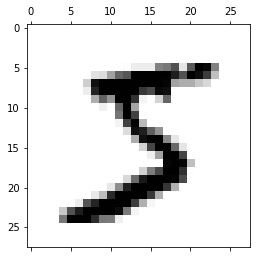

5


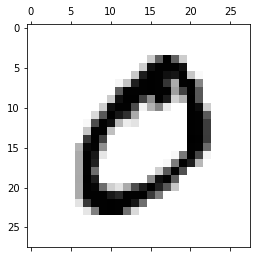

0


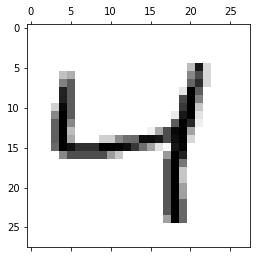

4


In [5]:
import matplotlib.pyplot as plt
for i in range(0,3):
    train_img = np.reshape(X_train[i, :], (28, 28))
    plt.matshow(train_img, cmap = plt.get_cmap('binary'))
    plt.show()
    print(np.argmax(y_train[i]))

In [6]:
model = Sequential([
    Dense(32, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [7]:
# optimizer
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [8]:
# add metrics:'accuracy'
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
print('Training ------------')
batch_size = 32
history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

Training ------------
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 79us/step - loss: 0.3738 - acc: 0.8972 - val_loss: 0.2281 - val_acc: 0.9343
Epoch 2/20
48000/48000 [==============================] - 3s 72us/step - loss: 0.2142 - acc: 0.9380 - val_loss: 0.1779 - val_acc: 0.9508
Epoch 3/20
48000/48000 [==============================] - 4s 74us/step - loss: 0.1762 - acc: 0.9491 - val_loss: 0.1612 - val_acc: 0.9537
Epoch 4/20
48000/48000 [==============================] - 4s 73us/step - loss: 0.1527 - acc: 0.9561 - val_loss: 0.1579 - val_acc: 0.9540
Epoch 5/20
48000/48000 [==============================] - 4s 77us/step - loss: 0.1373 - acc: 0.9604 - val_loss: 0.1447 - val_acc: 0.9597
Epoch 6/20
48000/48000 [==============================] - 4s 75us/step - loss: 0.1236 - acc: 0.9645 - val_loss: 0.1404 - val_acc: 0.9597
Epoch 7/20
48000/48000 [==============================] - 3s 65us/step - loss: 0.1144 - acc: 0.9674 - val_

In [15]:
print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test)

print('\ntest loss: ', loss)
print('test accuracy: ', accuracy)


Testing ------------
 9760/10000 [============================>.] - ETA: 0s
test loss:  0.138567378373
test accuracy:  0.9667


In [16]:
def plot_history(history, train_metrics, val_metrics, batch_size):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.title('batch_size=' + str(batch_size))

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_history(history, 'loss','val_loss', batch_size)
print("loss", np.round(history.history.get('val_loss'), 3))
plt.subplot(1,2,2)
plot_history(history, 'acc','val_acc', batch_size)
print("acc", np.round(history.history.get('val_acc'), 3))

loss [ 0.227  0.177  0.162  0.159  0.144  0.141  0.135  0.143  0.134  0.135
  0.133  0.133  0.138  0.138  0.146  0.145  0.14   0.143  0.148  0.152]
acc [ 0.935  0.951  0.954  0.953  0.96   0.959  0.963  0.962  0.963  0.964
  0.965  0.964  0.965  0.964  0.963  0.964  0.965  0.964  0.965  0.964]


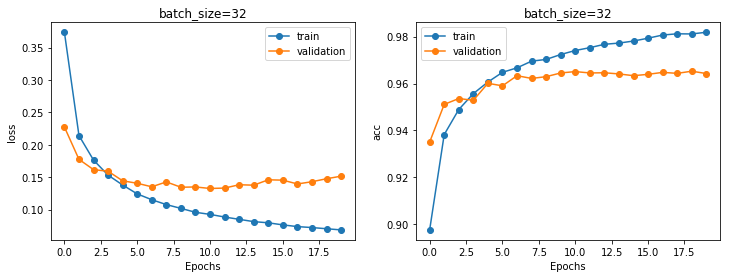

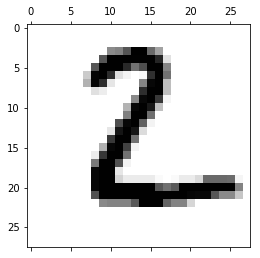

[  9.72547983e-16   1.46758126e-11   1.00000000e+00   2.23712836e-11
   9.05864986e-30   3.77871833e-13   8.96004025e-17   4.92175298e-25
   9.01584888e-19   7.00098262e-34]
Guess =  2 
 Ans =  2


In [18]:
ans = model.predict(X_test)[1]
train_img = np.reshape(X_test[1,], (28, 28))
plt.matshow(train_img, cmap = plt.get_cmap('binary'))
plt.show()
print(ans)
print("Guess = ", np.argmax(ans), "\n Ans = ", np.argmax(y_test[1]))

In [19]:
import numpy as np
output = []
for ele in model.predict(X_test):
    #print(np.argmax(ele))
    output = [output, ele]
    #output.fromlist(ele)


In [20]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [50]:
ans = model.predict(X_test)
y_pred_value = np.array([])
y_test_value = np.array([])

print(type(y_test))
for ele in ans:
    y_pred_value = np.append(y_pred_value, np.argmax(ele))
    #print(ele, np.argmax(ele))
for ele in y_test:
    y_test_value = np.append(y_test_value, np.argmax(ele))
    #print(ele, np.argmax(y_test))
#    y_test_value = [y_test_value, np.argmax(ele2)]
#print(shape(y_pred))
print(y_pred_value)
print(y_test_value)


<class 'numpy.ndarray'>
[ 7.  2.  1. ...,  4.  5.  6.]
[ 7.  2.  1. ...,  4.  5.  6.]


In [51]:
cnf_matrix = confusion_matrix(y_pred_value, y_test_value)
cnf_matrix
#plot_confusion_matrix

array([[ 963,    1,    4,    2,    1,    3,    5,    0,    9,    4],
       [   0, 1118,    3,    2,    0,    0,    3,    1,    1,    6],
       [   1,    7, 1003,   13,    3,    1,    5,   14,    8,    1],
       [   1,    0,    5,  968,    1,   14,    0,    5,   13,    8],
       [   1,    0,    3,    0,  959,    2,    4,    3,    2,   15],
       [   4,    0,    0,    5,    2,  850,    6,    1,    5,    5],
       [   5,    3,    4,    0,    4,    9,  932,    0,    2,    1],
       [   2,    1,    5,    7,    3,    3,    0,  997,    3,   10],
       [   2,    5,    5,    9,    1,    9,    3,    1,  928,   10],
       [   1,    0,    0,    4,    8,    1,    0,    6,    3,  949]])

In [1]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(0, 10),
                      title='Confusion matrix, without normalization')
plt.show()

NameError: name 'plt' is not defined

Normalized confusion matrix
[[  9.70766129e-01   1.00806452e-03   4.03225806e-03   2.01612903e-03
    1.00806452e-03   3.02419355e-03   5.04032258e-03   0.00000000e+00
    9.07258065e-03   4.03225806e-03]
 [  0.00000000e+00   9.85890653e-01   2.64550265e-03   1.76366843e-03
    0.00000000e+00   0.00000000e+00   2.64550265e-03   8.81834215e-04
    8.81834215e-04   5.29100529e-03]
 [  9.46969697e-04   6.62878788e-03   9.49810606e-01   1.23106061e-02
    2.84090909e-03   9.46969697e-04   4.73484848e-03   1.32575758e-02
    7.57575758e-03   9.46969697e-04]
 [  9.85221675e-04   0.00000000e+00   4.92610837e-03   9.53694581e-01
    9.85221675e-04   1.37931034e-02   0.00000000e+00   4.92610837e-03
    1.28078818e-02   7.88177340e-03]
 [  1.01112235e-03   0.00000000e+00   3.03336704e-03   0.00000000e+00
    9.69666330e-01   2.02224469e-03   4.04448938e-03   3.03336704e-03
    2.02224469e-03   1.51668352e-02]
 [  4.55580866e-03   0.00000000e+00   0.00000000e+00   5.69476082e-03
    2.27790433e-0

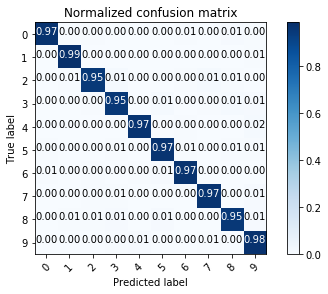

In [62]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(0, 10), normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [15]:
from keras.utils import multi_gpu_model
import time
s = time.time()
parallel_model = multi_gpu_model(model)
parallel_model.compile(optimizer=rmsprop,
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
parallel_model.fit(x, y, epochs=20, batch_size=256)
parallel_model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)
e = time.time()
print(e-s)

TypeError: multi_gpu_model() missing 1 required positional argument: 'gpus'

In [16]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14788790237076072682
]
